# Predicting Heart Disease

## Introduction

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others. The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.
Heart disease statistics in United States of America:
1. Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups
2. One person dies every 37 seconds in the United States from cardiovascular disease.
3. About 647,000 Americans die from heart disease each year—that’s 1 in every 4 deaths.
4. Heart disease costs the United States about $219 billion each year from 2014 to 2015. 



## Problem Statement

Of all the applications of machine-learning, diagnosing any serious disease using a black box is always going to be a hard sell. If the output from a model is the particular course of treatment (potentially with side-effects), or surgery, or the absence of treatment, people are going to want to know why. This dataset gives a number of variables along with a target condition of having or not having heart disease. Using this dataset I wish to build a model that helps predict the presence of heart disease in any new patient information which is input into this model. 
The goal of this project is: Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## Obtaining the dataset

The dataset for this project shall be obtained from the below mentioned links:
1.	 https://archive.ics.uci.edu/ml/datasets/Heart+Disease
2.	https://www.kaggle.com/ronitf/heart-disease-uci

Both the above mentioned link denote the same dataset. The Kaggle version of the dataset was obtained from the UCI dataset. 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.  The names and social security numbers of the patients were removed from the database. 

The features/columns used in this dataset are as follows:
1.	age - age in years
2.	sex - (1 = male; 0 = female)
3.	cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically, esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4.	trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5.	chol - serum cholesterol in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6.	fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7.	restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8.	thalach - maximum heart rate achieved
9.	exang - exercise induced angina (1 = yes; 0 = no)
10.	oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
11.	 slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with exercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12.	 ca - number of major vessels (0-3) colored by fluoroscopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13.	 thal - thallium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when exercising
14.	 target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
pd.set_option("display.float", "{:.2f}".format)

In [2]:
# Loading the dataset
df = pd.read_csv("heart.csv")

# Preview of the dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


## Exploratory Data Analysis and Visualization

In [3]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trestbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalach,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exang,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


### - Univariate Data Analysis

'Target' here refers to the presence of heart disease in the patient.
1: Heart disease present
0: Heart disease absent

In [5]:
# Gives the counts of people who have heart disease and who don't
# Model seems to be pretty much balanced
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

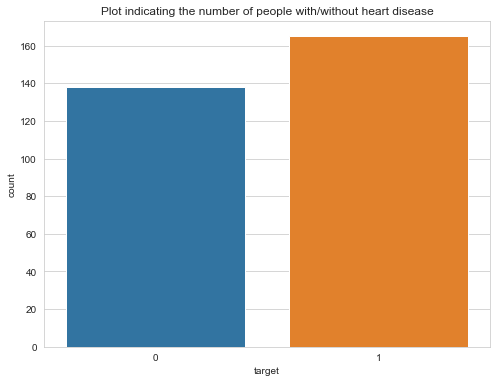

In [6]:
# Visualization:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="target", data=df)
plt.title("Plot indicating the number of people with/without heart disease")
plt.show()

'Sex' variable contains two integer values 1 and 0 : (1 = male; 0 = female).

In [7]:
# Gender distribution for people with heart disease
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

Out of 96 females - 72 have heart disease and 24 do not have heart disease.
Out of 207 males - 93 have heart disease and 114 do not have heart disease.

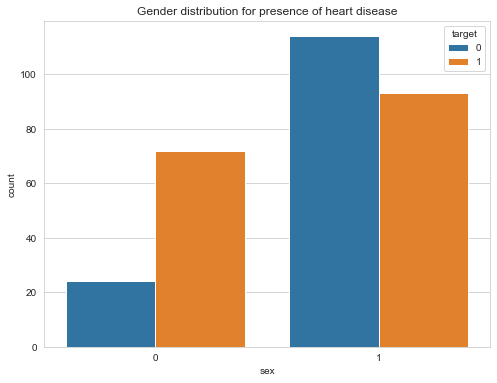

In [8]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.title("Gender distribution for presence of heart disease")
plt.show()


Visualize the target values distribution with respect to fbs (fasting blood sugar) 

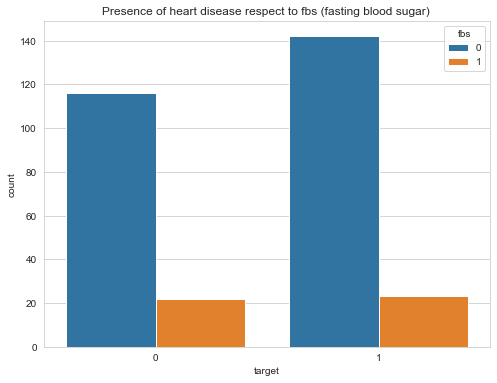

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fbs", data=df)
plt.title("Presence of heart disease respect to fbs (fasting blood sugar) ")
plt.show()

Visualize the target values distribution with respect to exang (exercise induced angina)

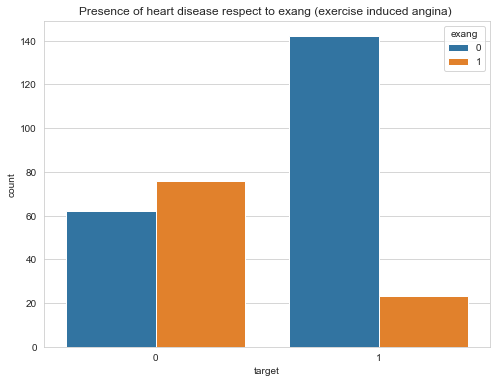

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.title("Presence of heart disease respect to exang (exercise induced angina) ")
plt.show()

### - Bivariate Data Analysis

Finding correlation between variables

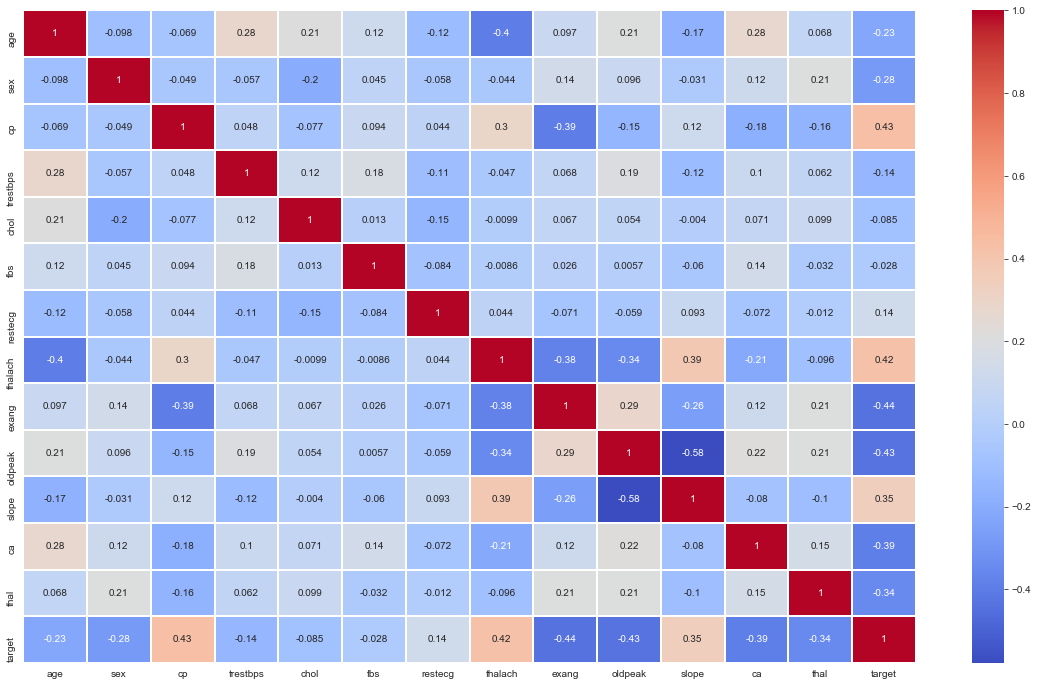

In [11]:
correlation = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(data=correlation, annot=True, linecolor='white', linewidths=1, cmap='coolwarm')

In [12]:
# Correlation of variables with respect to the target variable

correlation['target'].sort_values(ascending=False)

target      1.00
cp          0.43
thalach     0.42
slope       0.35
restecg     0.14
fbs        -0.03
chol       -0.09
trestbps   -0.14
age        -0.23
sex        -0.28
thal       -0.34
ca         -0.39
oldpeak    -0.43
exang      -0.44
Name: target, dtype: float64

- cp (chest pain type), thalach (maximum heart rate achieved), slope (the slope of the peak exercise ST segment), restecg (resting electrocardiographic results) - they have a good positive correlation with respect to the target variable.
- oldpeak (ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more), exang (exercise induced angina (1 = yes; 0 = no) - they have a significant negative correlation with respect to the target variable.

#### Exploring Chest Pain and target value

cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [13]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

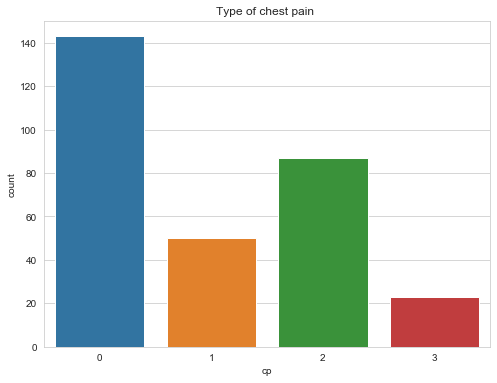

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", data=df)
plt.title("Type of chest pain ")
plt.show()

Frequency distribution of target variable with respect to cp

In [15]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

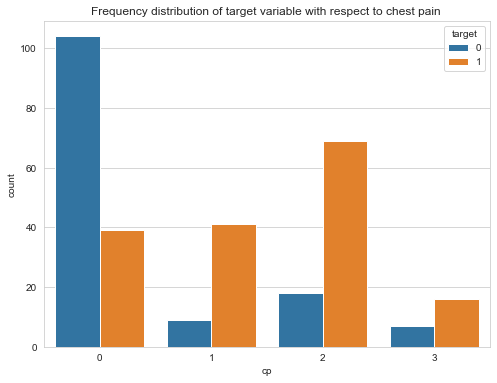

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.title("Frequency distribution of target variable with respect to chest pain ")
plt.show()

#### Exploring maximum heart rate achieved and target value

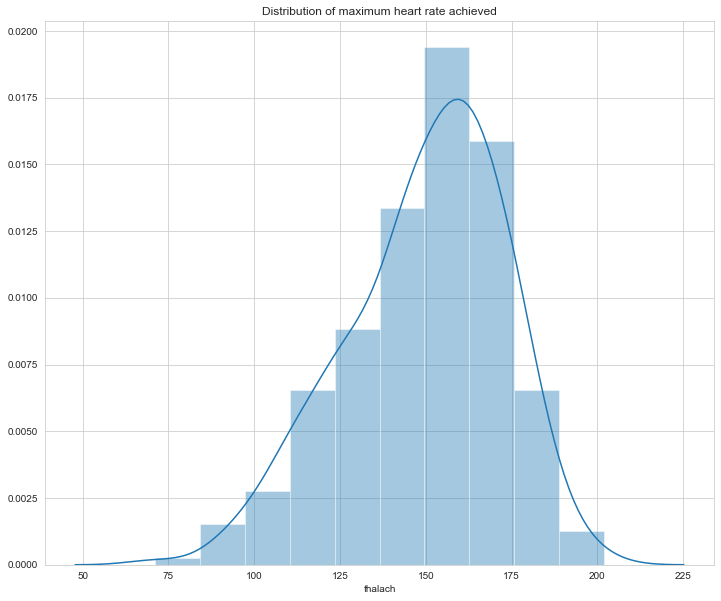

In [17]:
f, ax = plt.subplots(figsize=(12,10))
x = df['thalach']
ax = sns.distplot(x, bins=10)
plt.title("Distribution of maximum heart rate achieved")
plt.show()

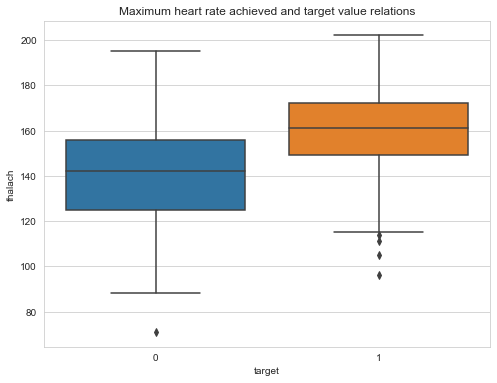

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.title("Maximum heart rate achieved and target value relations")
plt.show()

The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

In [19]:
df['age'].describe()

count   303.00
mean     54.37
std       9.08
min      29.00
25%      47.50
50%      55.00
75%      61.00
max      77.00
Name: age, dtype: float64

The mean value of the age variable is 54.37 years. The minimum and maximum values of age are 29 and 77 years.

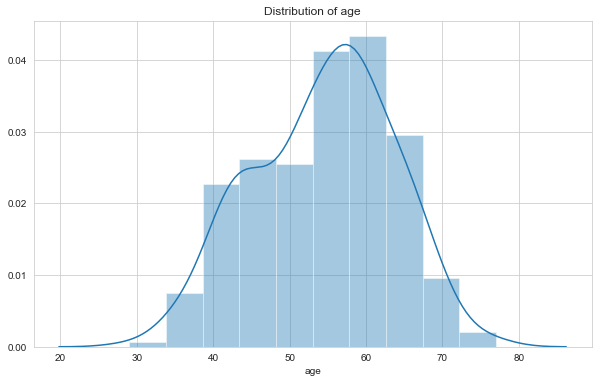

In [20]:
f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.title("Distribution of age")
plt.show()

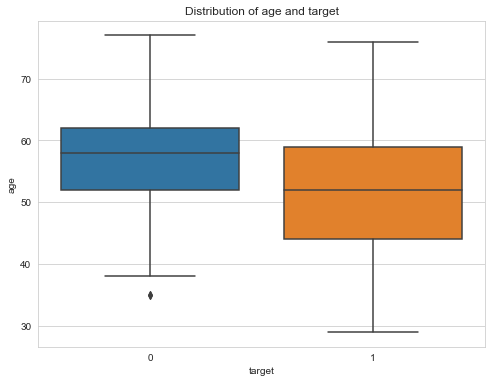

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.title("Distribution of age and target")
plt.show()

- The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.
- The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the people who do not have heart disease.

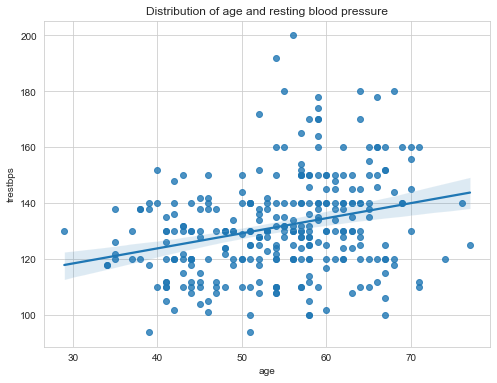

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.title("Distribution of age and resting blood pressure")
plt.show()
# Regression model is not a good fit for this data

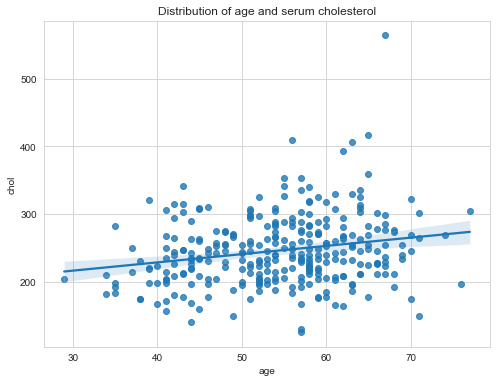

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.title("Distribution of age and serum cholesterol")
plt.show()

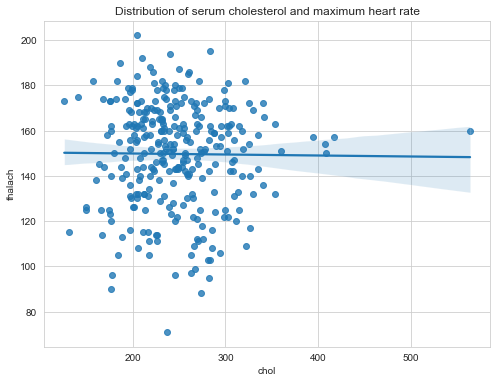

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.title("Distribution of serum cholesterol and maximum heart rate")
plt.show()

There is no correlation between chol and thalach variable

### - Multivariate Data Analysis

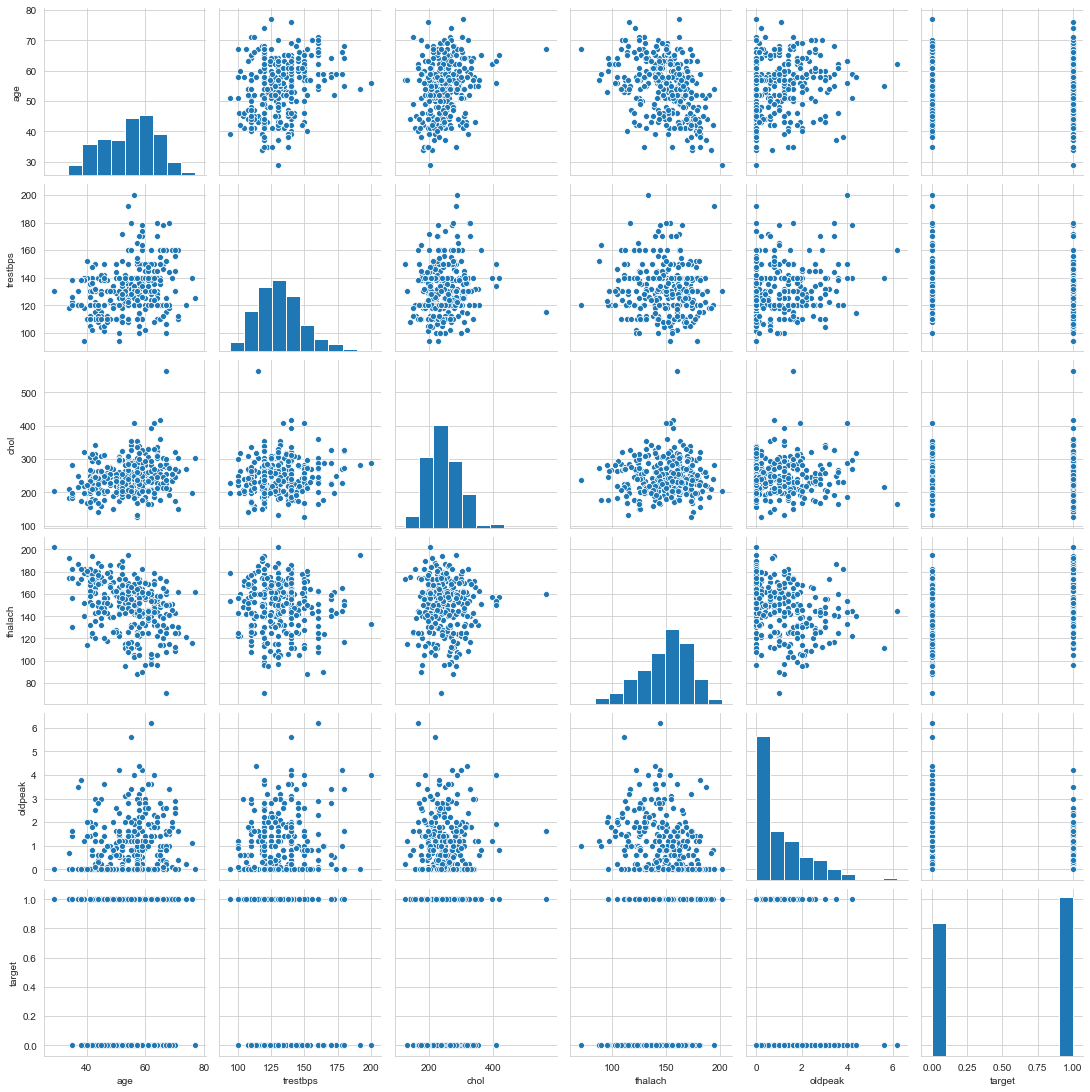

In [25]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

## Data Pre-processing and Data Wrangling

In [26]:
# Checking for missing values in the dataset

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
categorical_val = []
numerical_val = []
for column in df.columns:
    print('***************************************************************************************')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        numerical_val.append(column)

***************************************************************************************
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
***************************************************************************************
sex : [1 0]
***************************************************************************************
cp : [3 2 1 0]
***************************************************************************************
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
***************************************************************************************
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 

In [28]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [29]:
numerical_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

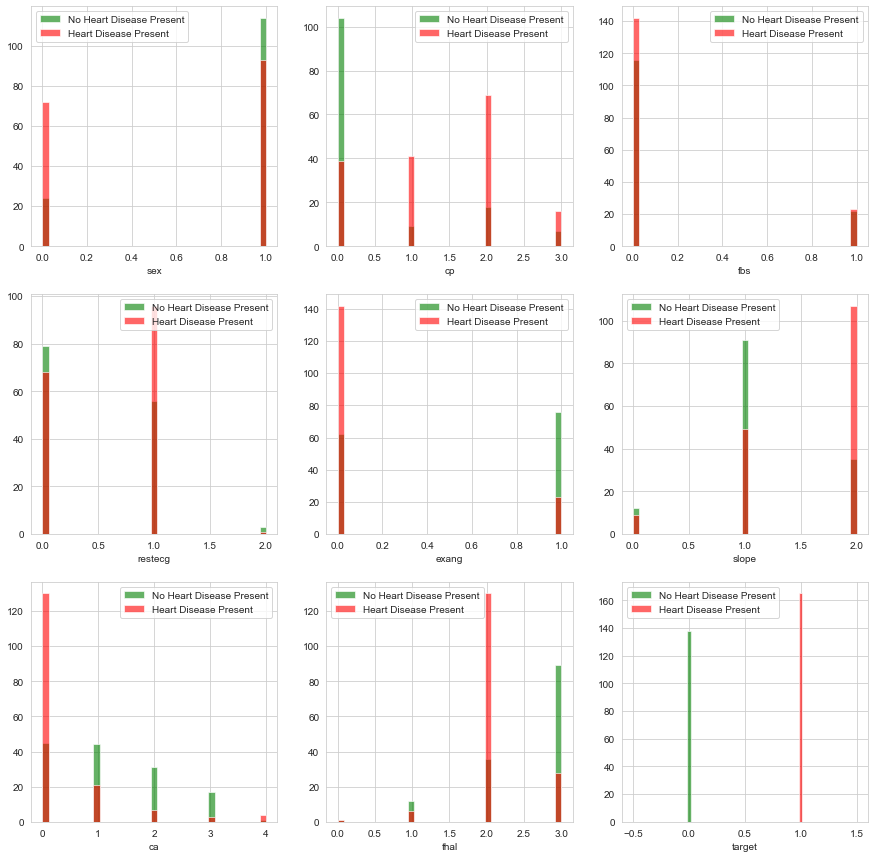

In [30]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='green', label='No Heart Disease Present', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Heart Disease Present', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- cp (Chest Pain) : People with cp = 1, 2, 3 are more likely to have heart disease than people with cp = 0.

- restecg (resting electrocardiographic results) : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

- exang (exercise induced angina) : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

- slope (the slope of the peak exercise ST segment) : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

- ca (number of major vessels (0-3) colored by flourosopy) : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.

- thal (thalium stress result) : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

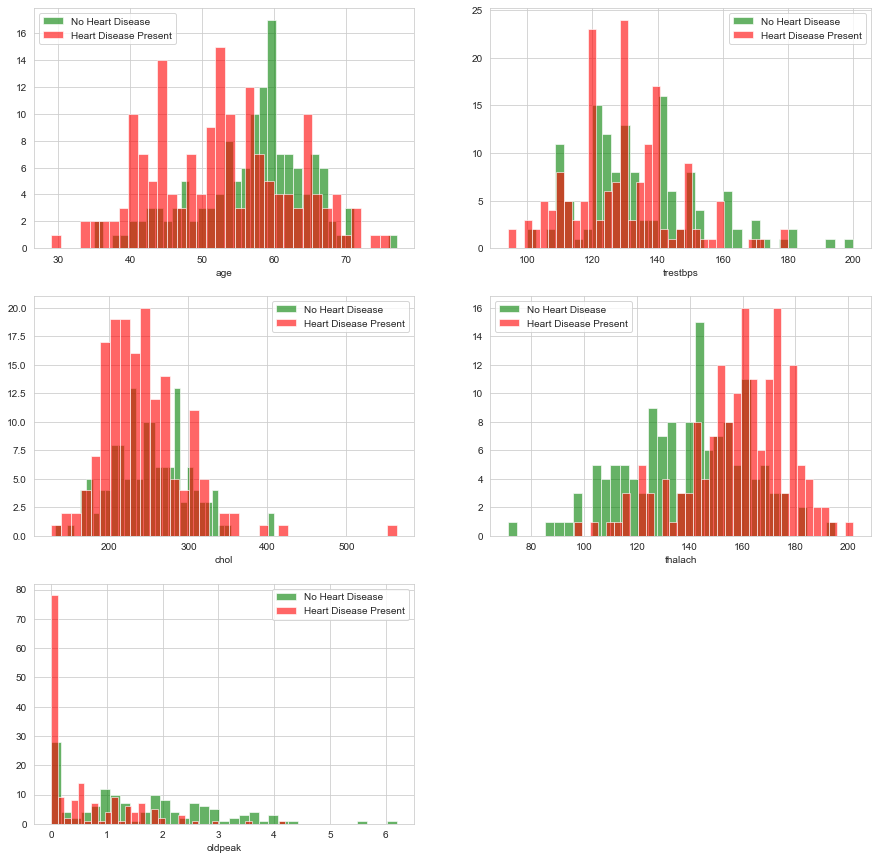

In [31]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(numerical_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='green', label='No Heart Disease', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Heart Disease Present', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- age: younger people seem to have heart disease more frequently than older people

- trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

- chol (serum cholestoral in mg/dl) : above 200 is cause for concern. People with high cholesterol are more likely to have a heart disease.

- thalach (maximum heart rate achieved) : People who acheived a maximum heart rate more than 140 are more likely to have heart disease.

- oldpeak: ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more. 

#### Converting categorical variables into dummy variables

In [32]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [33]:
# After categorical encoding

dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [34]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [36]:
# After scaling the variables

dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    uint8  
 7   sex_1      303 non-null    uint8  
 8   cp_0       303 non-null    uint8  
 9   cp_1       303 non-null    uint8  
 10  cp_2       303 non-null    uint8  
 11  cp_3       303 non-null    uint8  
 12  fbs_0      303 non-null    uint8  
 13  fbs_1      303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  exang_0    303 non-null    uint8  
 18  exang_1    303 non-null    uint8  
 19  slope_0    303 non-null    uint8  
 20  slope_1   

## Building the Machine Learning model

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(model_type, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model_type.predict(X_train)
        print("\n\n")
        print("TRAIN RESULT: ")
        print("--------------")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model_type.predict(X_test)
        print("*****************************************************************************\n")
        print("TEST RESULT: ")
        print("--------------")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [39]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
print_score(logistic_regression, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 86.79%
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 86.81%
Classification Report:	Precision Score: 86.54%
			Recall Score: 90.00%
			F1 score: 88.24%
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [42]:
lr_test_score = accuracy_score(y_test, logistic_regression.predict(X_test)) * 100
lr_train_score = accuracy_score(y_train, logistic_regression.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", lr_train_score, lr_test_score, (lr_train_score-lr_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Logistic Regression,86.79,86.81,-0.02


## 2. K-Nearest Neighbors (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 86.79%
Classification Report:	Precision Score: 87.18%
			Recall Score: 88.70%
			F1 score: 87.93%
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 86.81%
Classification Report:	Precision Score: 88.00%
			Recall Score: 88.00%
			F1 score: 88.00%
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



In [44]:
kn_test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
kn_train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-Nearest Neighbors", kn_train_score, kn_test_score, (kn_train_score-kn_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Logistic Regression,86.79,86.81,-0.02
1,K-Nearest Neighbors,86.79,86.81,-0.02


## 3. Support Vector Machine (SVM)

In [45]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 93.40%
Classification Report:	Precision Score: 93.16%
			Recall Score: 94.78%
			F1 score: 93.97%
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 87.91%
Classification Report:	Precision Score: 89.80%
			Recall Score: 88.00%
			F1 score: 88.89%
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



In [47]:
sv_test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
sv_train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", sv_train_score, sv_test_score, (sv_train_score-sv_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Logistic Regression,86.79,86.81,-0.02
1,K-Nearest Neighbors,86.79,86.81,-0.02
2,Support Vector Machine,93.40,87.91,5.48


## 4. Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

print_score(decision_tree, X_train, y_train, X_test, y_test, train=True)
print_score(decision_tree, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 100.00%
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 78.02%
Classification Report:	Precision Score: 84.09%
			Recall Score: 74.00%
			F1 score: 78.72%
Confusion Matrix: 
 [[34  7]
 [13 37]]



In [49]:
dt_test_score = accuracy_score(y_test, decision_tree.predict(X_test)) * 100
dt_train_score = accuracy_score(y_train, decision_tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", dt_train_score, dt_test_score, (dt_train_score-dt_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Logistic Regression,86.79,86.81,-0.02
1,K-Nearest Neighbors,86.79,86.81,-0.02
2,Support Vector Machine,93.40,87.91,5.48
3,Decision Tree Classifier,100.00,78.02,21.98


## 5. Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(X_train, y_train)

print_score(random_forest, X_train, y_train, X_test, y_test, train=True)
print_score(random_forest, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 100.00%
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 82.42%
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



In [51]:
for_test_score = accuracy_score(y_test, random_forest.predict(X_test)) * 100
for_train_score = accuracy_score(y_train, random_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", for_train_score, for_test_score, (for_train_score-for_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Logistic Regression,86.79,86.81,-0.02
1,K-Nearest Neighbors,86.79,86.81,-0.02
2,Support Vector Machine,93.40,87.91,5.48
3,Decision Tree Classifier,100.00,78.02,21.98
4,Random Forest Classifier,100.00,82.42,17.58


## 6. XGBoost Classifier

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 100.00%
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 82.42%
Classification Report:	Precision Score: 84.00%
			Recall Score: 84.00%
			F1 score: 84.00%
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



In [53]:
xg_test_score = accuracy_score(y_test, xgb.predict(X_test)) * 100
xg_train_score = accuracy_score(y_train, xgb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", xg_train_score, xg_test_score, (xg_train_score-xg_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Logistic Regression,86.79,86.81,-0.02
1,K-Nearest Neighbors,86.79,86.81,-0.02
2,Support Vector Machine,93.40,87.91,5.48
3,Decision Tree Classifier,100.00,78.02,21.98
4,Random Forest Classifier,100.00,82.42,17.58
5,XGBoost Classifier,100.00,82.42,17.58


In [54]:
ml_models = pd.DataFrame({
    'Models': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines',
              'Decision Tree Classifier', 'Random Forest Classifier',  'XGBoost Classifier'],
    
    'Training_Scores': [lr_train_score, kn_train_score, sv_train_score, 
                                 dt_train_score, for_train_score, xg_train_score],
    
    'Testing_Scores': [lr_test_score, kn_test_score, sv_test_score, 
                                dt_test_score, for_test_score, xg_test_score ]

                    })

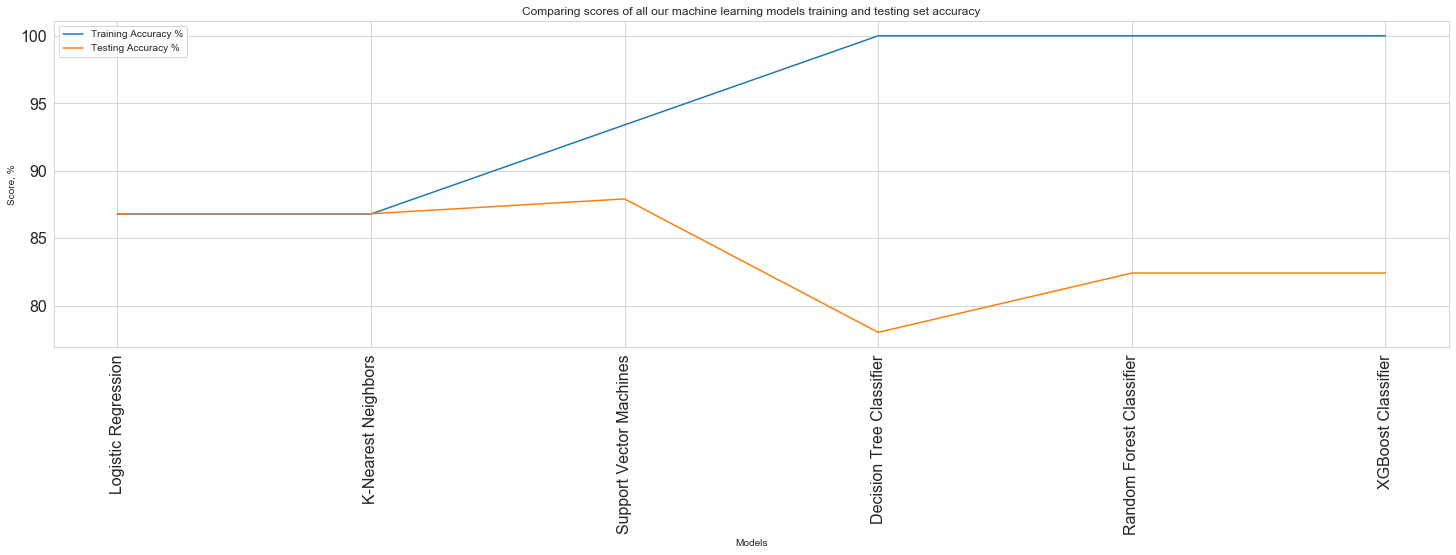

In [55]:
plt.figure(figsize=[25,6])
qq = ml_models['Models']
plt.tick_params(labelsize=16)
plt.plot(qq, ml_models['Training_Scores'], label = 'Training Accuracy %')
plt.plot(qq, ml_models['Testing_Scores'], label = 'Testing Accuracy %')
plt.legend()
plt.title('Comparing scores of all our machine learning models training and testing set accuracy')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(qq, rotation='vertical')
plt.show()

In [56]:
ml_models.sort_values(by=['Training_Scores'], ascending=False)

,Models,Training_Scores,Testing_Scores
3,Decision Tree Classifier,100.00,78.02
4,Random Forest Classifier,100.00,82.42
5,XGBoost Classifier,100.00,82.42
2,Support Vector Machines,93.40,87.91
0,Logistic Regression,86.79,86.81
1,K-Nearest Neighbors,86.79,86.81


In [57]:
ml_models.sort_values(by=['Testing_Scores'], ascending=False)

,Models,Training_Scores,Testing_Scores
2,Support Vector Machines,93.40,87.91
0,Logistic Regression,86.79,86.81
1,K-Nearest Neighbors,86.79,86.81
4,Random Forest Classifier,100.00,82.42
5,XGBoost Classifier,100.00,82.42
3,Decision Tree Classifier,100.00,78.02


## Applying Machine Learning algorithms with Hyperparameter Tuning

When creating a machine learning model, there would be many design choices as to how to define your model architecture. Often times, we don't immediately know what the optimal model architecture should be for a given model, and thus we'd like to be able to explore a range of possibilities. In true machine learning fashion, we'll ideally ask the machine to perform this exploration and select the optimal model architecture automatically. Parameters which define the model architecture are referred to as "hyperparameters" and thus this process of searching for the ideal model architecture is referred to as "hyperparameter tuning".

## 1. Logistic Regression with Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

logistic_regression = LogisticRegression()

grid_search_cv = GridSearchCV(logistic_regression, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)

In [59]:
logistic_regression = LogisticRegression(C=0.615848211066026, solver='liblinear')

logistic_regression.fit(X_train, y_train)

print_score(logistic_regression, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 87.26%
Classification Report:	Precision Score: 86.07%
			Recall Score: 91.30%
			F1 score: 88.61%
Confusion Matrix: 
 [[ 80  17]
 [ 10 105]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 86.81%
Classification Report:	Precision Score: 86.54%
			Recall Score: 90.00%
			F1 score: 88.24%
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [60]:
logreg_test_score = accuracy_score(y_test, logistic_regression.predict(X_test)) * 100
logreg_train_score = accuracy_score(y_train, logistic_regression.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", logreg_train_score, logreg_test_score, (logreg_train_score-logreg_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Tuned Logistic Regression,87.26,86.81,0.45


## 2. K-Nearest Neighbors with Hyperparameter Tuning

In [61]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score obtained on the test data: 89.01%


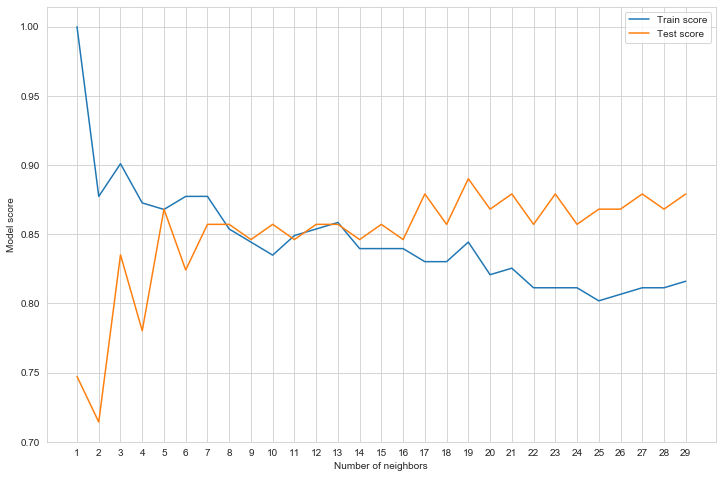

In [62]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 30, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score obtained on the test data: {max(test_score)*100:.2f}%")

In [63]:
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 84.43%
Classification Report:	Precision Score: 82.54%
			Recall Score: 90.43%
			F1 score: 86.31%
Confusion Matrix: 
 [[ 75  22]
 [ 11 104]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 89.01%
Classification Report:	Precision Score: 87.04%
			Recall Score: 94.00%
			F1 score: 90.38%
Confusion Matrix: 
 [[34  7]
 [ 3 47]]



In [64]:
knn_test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
knn_train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", knn_train_score, knn_test_score, (knn_train_score-knn_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Tuned Logistic Regression,87.26,86.81,0.45
1,Tuned K-nearest neighbors,84.43,89.01,-4.58


## 3. Support Vector Machine with Hyperparameter Tuning

In [65]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_grid = GridSearchCV(svm_model, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")

In [66]:
svm_model = SVC(C=5, gamma=0.01, kernel='rbf')
svm_model.fit(X_train, y_train)

print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 87.74%
Classification Report:	Precision Score: 87.39%
			Recall Score: 90.43%
			F1 score: 88.89%
Confusion Matrix: 
 [[ 82  15]
 [ 11 104]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 84.62%
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



In [67]:
svm_test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
svm_train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", svm_train_score, svm_test_score, (svm_train_score-svm_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Tuned Logistic Regression,87.26,86.81,0.45
1,Tuned K-nearest neighbors,84.43,89.01,-4.58
2,Tuned Support Vector Machine,87.74,84.62,3.12


## 4. Decision Tree Classifier with Hyperparameter Tuning

In [68]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

decision_tree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(decision_tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)

In [69]:
decision_tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')
decision_tree.fit(X_train, y_train)

print_score(decision_tree, X_train, y_train, X_test, y_test, train=True)
print_score(decision_tree, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 85.38%
Classification Report:	Precision Score: 83.87%
			Recall Score: 90.43%
			F1 score: 87.03%
Confusion Matrix: 
 [[ 77  20]
 [ 11 104]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 84.62%
Classification Report:	Precision Score: 86.00%
			Recall Score: 86.00%
			F1 score: 86.00%
Confusion Matrix: 
 [[34  7]
 [ 7 43]]



In [70]:
tree_test_score = accuracy_score(y_test, decision_tree.predict(X_test)) * 100
tree_train_score = accuracy_score(y_train, decision_tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", tree_train_score, tree_test_score, (tree_train_score-tree_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Tuned Logistic Regression,87.26,86.81,0.45
1,Tuned K-nearest neighbors,84.43,89.01,-4.58
2,Tuned Support Vector Machine,87.74,84.62,3.12
3,Tuned Decision Tree Classifier,85.38,84.62,0.76


## 5. Random Forest Classifier with Hyperparameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


In [72]:
rand_forest = RandomForestClassifier(bootstrap=True,
                                     max_depth=70, 
                                     max_features='auto', 
                                     min_samples_leaf=4, 
                                     min_samples_split=10,
                                     n_estimators=400)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 91.98%
Classification Report:	Precision Score: 91.53%
			Recall Score: 93.91%
			F1 score: 92.70%
Confusion Matrix: 
 [[ 87  10]
 [  7 108]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 84.62%
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



In [74]:
rf_test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
rf_train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", rf_train_score, rf_test_score, (rf_train_score-rf_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', '(TrainScore - TestScore)'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Tuned Logistic Regression,87.26,86.81,0.45
1,Tuned K-nearest neighbors,84.43,89.01,-4.58
2,Tuned Support Vector Machine,87.74,84.62,3.12
3,Tuned Decision Tree Classifier,85.38,84.62,0.76
4,Tuned Random Forest Classifier,91.98,84.62,7.37


## 6. XGBoost Classifier with Hyperparameter Tuning

In [75]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }

xgb_model = XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=650, scoring = 'accuracy',n_jobs =-1, iid=True,
                               verbose=1, return_train_score = True, random_state=42)


In [76]:
xgb_best = XGBClassifier(base_score=0.25, 
                         booster='gbtree',
                         learning_rate=0.05, 
                         max_depth=5,
                         min_child_weight=2, 
                         n_estimators=100)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
print_score(xgb_best, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_best, X_train, y_train, X_test, y_test, train=False)




TRAIN RESULT: 
--------------
Accuracy Score: 96.23%
Classification Report:	Precision Score: 95.73%
			Recall Score: 97.39%
			F1 score: 96.55%
Confusion Matrix: 
 [[ 92   5]
 [  3 112]]

*****************************************************************************

TEST RESULT: 
--------------
Accuracy Score: 83.52%
Classification Report:	Precision Score: 84.31%
			Recall Score: 86.00%
			F1 score: 85.15%
Confusion Matrix: 
 [[33  8]
 [ 7 43]]



In [78]:
xgb_test_score = accuracy_score(y_test, xgb_best.predict(X_test)) * 100
xgb_train_score = accuracy_score(y_train, xgb_best.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", xgb_train_score, xgb_test_score,(xgb_train_score-xgb_test_score)]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','(TrainScore - TestScore)'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %,(TrainScore - TestScore)
0,Tuned Logistic Regression,87.26,86.81,0.45
1,Tuned K-nearest neighbors,84.43,89.01,-4.58
2,Tuned Support Vector Machine,87.74,84.62,3.12
3,Tuned Decision Tree Classifier,85.38,84.62,0.76
4,Tuned Random Forest Classifier,91.98,84.62,7.37
5,Tuned XGBoost Classifier,96.23,83.52,12.71


In [79]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machines',
              'Decision Tree Classifier', 'Random Forest Classifier',  'XGBoost Classifier'],
    
    'Training_Accuracy_Scores': [logreg_train_score, knn_train_score, svm_train_score, 
                                 tree_train_score, rf_train_score, xgb_train_score],
    
    'Testing_Accuracy_Scores': [logreg_test_score, knn_test_score, svm_test_score, 
                                tree_test_score, rf_test_score, xgb_test_score ]

                    })

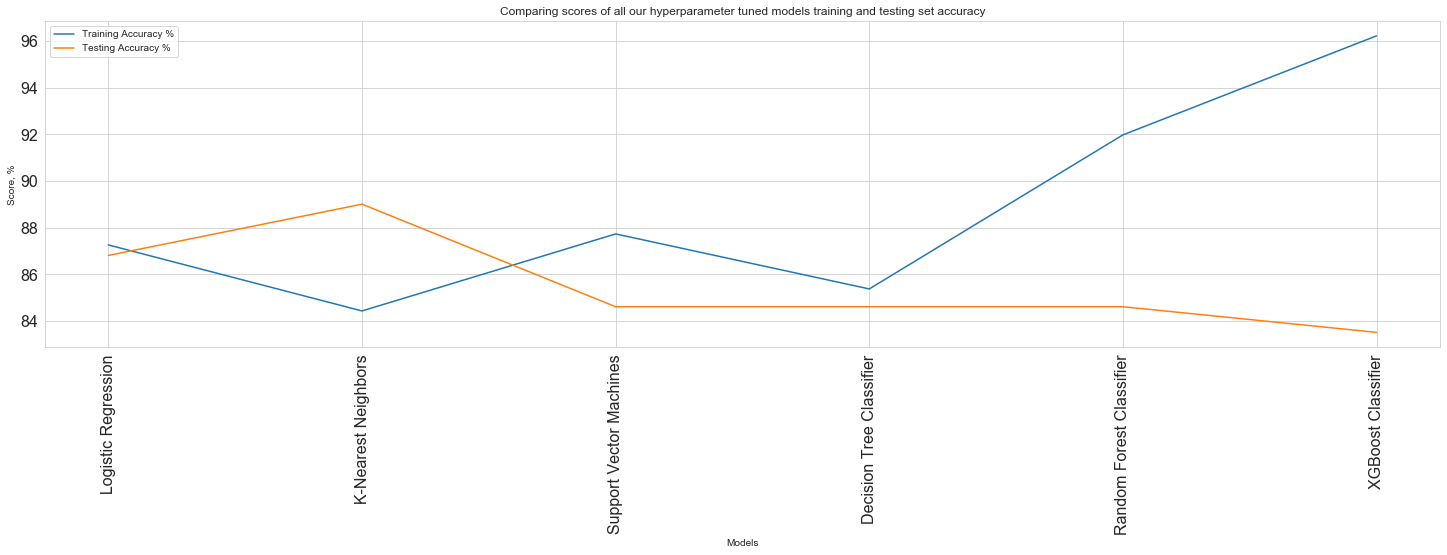

In [80]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=16)
plt.plot(xx, models['Training_Accuracy_Scores'], label = 'Training Accuracy %')
plt.plot(xx, models['Testing_Accuracy_Scores'], label = 'Testing Accuracy %')
plt.legend()
plt.title('Comparing scores of all our hyperparameter tuned models training and testing set accuracy')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.show()

In [81]:
models.sort_values(by=['Training_Accuracy_Scores'], ascending=False)

,Model,Training_Accuracy_Scores,Testing_Accuracy_Scores
5,XGBoost Classifier,96.23,83.52
4,Random Forest Classifier,91.98,84.62
2,Support Vector Machines,87.74,84.62
0,Logistic Regression,87.26,86.81
3,Decision Tree Classifier,85.38,84.62
1,K-Nearest Neighbors,84.43,89.01


In [82]:
models.sort_values(by=['Testing_Accuracy_Scores'], ascending=False)

,Model,Training_Accuracy_Scores,Testing_Accuracy_Scores
1,K-Nearest Neighbors,84.43,89.01
0,Logistic Regression,87.26,86.81
2,Support Vector Machines,87.74,84.62
3,Decision Tree Classifier,85.38,84.62
4,Random Forest Classifier,91.98,84.62
5,XGBoost Classifier,96.23,83.52


# Conclusion


### 1. Conclusion on Machine Learning models:
- Random Forest, Decicion Tree and XGBoost classifier seems to perform the best on training set with an accuracy of 100%.
- SVM classifier seems to perform best on the test set with an accuracy of 87.91%.
- Logistic Regression and K-Nearest Neighbors showed the least difference between the training and testing set accuracy of just 0.02% and their test scores beat the training scores.

### 2. Conclusion on using Hyperparameter Tuning on Machine Learning models:
- XGBoost classifier seems to perform the best on training set with an accuracy of 96.23%.
- K-Nearest Neighbors classifier seems to perform best on the test set with an accuracy of 89.01% beating its test set accuracy of 84.43%
- Logistic Regression showed the least difference between the training and testing set accuracy of just 0.45%